In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

from common_plotting import read_data, plot, years, months, yearsFmt, find_file


In [10]:
pt100_data = pd.read_csv(find_file('ks3458a-k2000-20-res-tempco-log.csv'), parse_dates=['datetime']).set_index('datetime')
pt100_data2 = pd.read_csv(find_file('k2000-20-4w-res-log.csv'), parse_dates=['datetime'], low_memory=False).set_index('datetime')
pt100_data2 = pt100_data2[pt100_data2['dut'] == 'Pt100']

In [3]:
# From https://us.flukecal.com/pt100-calculator for PT-385
R0 = 100
A = 3.9083e-3
B = -5.775e-7
PT385_eq = lambda t, Rt: R0 * (1 + A*t + B*(t**2)) - Rt
fsolve(PT385_eq, 30, args=(109.80,))[0]
fsolve(PT385_eq, 30, args=(114.090796,))[0]

36.24766091713376

<Axes: xlabel='datetime'>

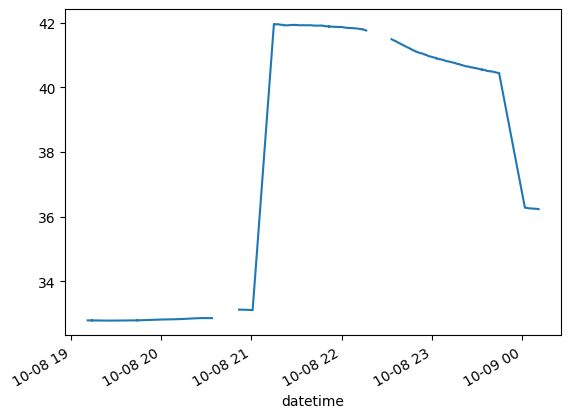

In [4]:
pt100_data['pt100_temperature'] = pt100_data['k2000_20_pt100_ohm'].dropna().apply(lambda resistance: fsolve(PT385_eq, 25, args=(resistance,))[0])
pt100_data['pt100_temperature'].last('5h').plot()

<Axes: xlabel='datetime'>

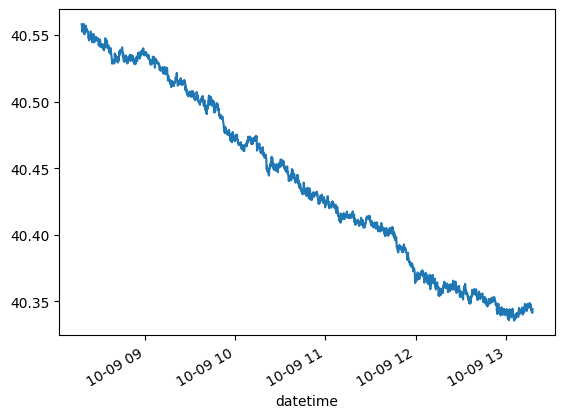

In [11]:
pt100_data2['pt100_temperature'] = pt100_data2['k2000_ohm'].dropna().apply(lambda resistance: fsolve(PT385_eq, 25, args=(resistance,))[0])
pt100_data2['pt100_temperature'].last('5h').plot()

In [6]:
pt100_comparison_data = pd.read_csv('k2000-x2-4w-res-log.csv', parse_dates=['datetime']).set_index('datetime')

FileNotFoundError: [Errno 2] No such file or directory: 'k2000-x2-4w-res-log.csv'

<AxesSubplot:xlabel='datetime'>

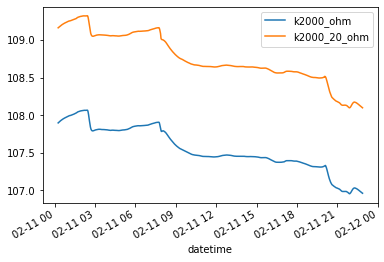

In [ ]:
pt100_comparison_data[['k2000_ohm','k2000_20_ohm']].plot()

In [ ]:
pt100_data['k2000_20_pt100_ohm']

datetime
2023-10-03 09:29:50.901854           NaN
2023-10-03 09:30:27.078226    111.678043
2023-10-03 09:31:03.281876    111.677585
2023-10-03 09:31:39.437423    111.677395
2023-10-03 09:32:15.591180    111.677254
                                 ...    
2023-10-08 22:42:07.866039    116.033055
2023-10-08 22:42:19.974915    116.031991
2023-10-08 22:42:32.095221    116.029645
2023-10-08 22:42:44.215834    116.027161
2023-10-08 22:42:56.343000    116.024889
Name: k2000_20_pt100_ohm, Length: 12952, dtype: float64